In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

In [14]:
def plot_train_log(file_path, loss_or_acc):
    '''
    Plot learning curve
    ---------
    Arguments:
    file_path   - the save path of learning log, should be a csv file
    loss_or_acc - bool, 'loss' or 'acc', choose to plot loss curve or acc curve
    '''
    assert file_path[-3:] == 'csv', f"Input file should be a csv file, got '{file_path[-3:]}'"
    
    train_log = pd.read_csv(file_path)
    train_log = train_log[train_log['Iteration']!=0]
    train_loss = train_log['Train Loss']
    train_acc = train_log['Train Acc']
    if loss_or_acc == 'loss':
        plt.plot(train_loss)
    elif loss_or_acc == 'acc':
        plt.plot(train_acc)
    
    
def plot_test_res(file_path, style=None, latent=0):
    '''
    Plot test set result
    ----------
    Arguments:
    file_path    - the save path of test set result, should be a npy file
    '''
    assert file_path[-3:] == 'npy', f"Input file should be a npy file, got '{file_path[-3:]}'"
    
    res = np.load(file_path)
    print(np.max(res[latent:]))
    if style is None:
        style = 'o--'
    plt.plot(res, style)
    
def plot_all(exps, legends, fig_name = None, styles = None, latent=0):
    plt.figure(figsize =[12,4], dpi=100)
    plt.subplot(1,2,1)
    for exp in exps:
        file_path = f'./res/{exp}_log.csv'
        plot_train_log(file_path, 'acc')
    
    plt.xlabel('Iterations(per 100)')
    plt.ylabel('Training Accuracy')
    plt.title('Learning Curve')
    
    if latent > 0:
        plt.vlines(latent*37, ymin=0, ymax = 100, colors='r')
        legends += ['latent_barrier']
    plt.legend(legends)
    
    plt.subplot(1,2,2)
    for i, exp in enumerate(exps):
        file_path = f'./res/{exp}_test.npy'
        if styles is not None:
            style = styles[i]
        else:
            style = None
        plot_test_res(file_path, style, latent)
    plt.xlabel('Epoch')
    plt.ylabel('Test Accuracy')
    plt.title('Test set performance')
    if latent > 0:
        plt.vlines(latent, ymin=0, ymax = 100, colors='r')
        legends += ['latent_barrier']
    plt.legend(legends)
    
    if fig_name is not None:
        plt.savefig(f'./figures/{fig_name}.png', bbox_inches='tight')

# EXP1

## Quantization

91.75
91.60526315789474
91.84210526315789
91.77631578947368
83.15789473684211


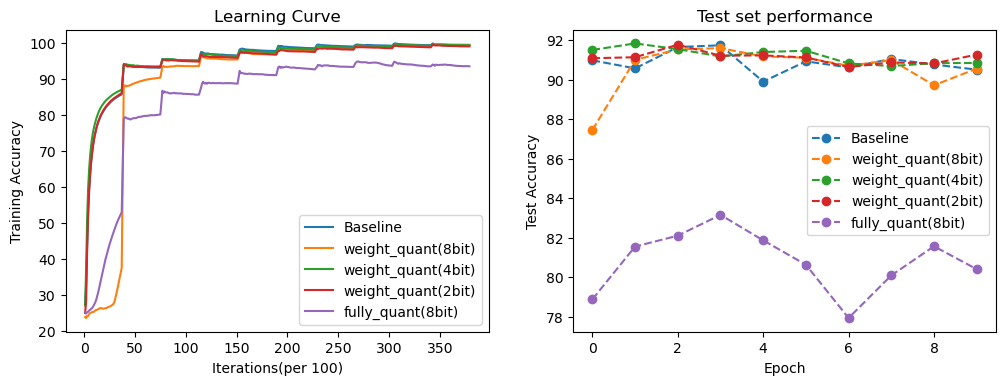

In [3]:
exps = ['BASELINE', 
        'BASELINE_8bit', 
        'BASELINE_4bit',
        'BASELINE_2bit',
        'quant_all_clip']
legends = ['Baseline', 'weight_quant(8bit)', 'weight_quant(4bit)', 'weight_quant(2bit)', 'fully_quant(8bit)']
fig_name='EXP1-1'
plot_all(exps, legends, fig_name)


## Binarization

91.75
83.71052631578948
85.55263157894737


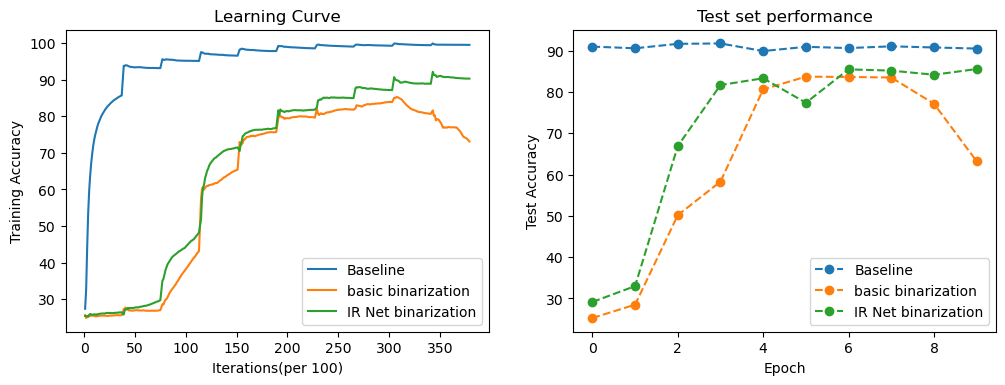

In [4]:
exps = ['BASELINE', 
         'ALL_wo_final',
         'IRNET'
        ]
legends = ['Baseline', 'basic binarization', 'IR Net binarization']
fig_name = 'EXP1-2'
plot_all(exps, legends, fig_name)

# EXP2

## Binarizing different parts of transformer

91.75
86.90789473684211
91.40789473684211
89.84210526315789
25.0


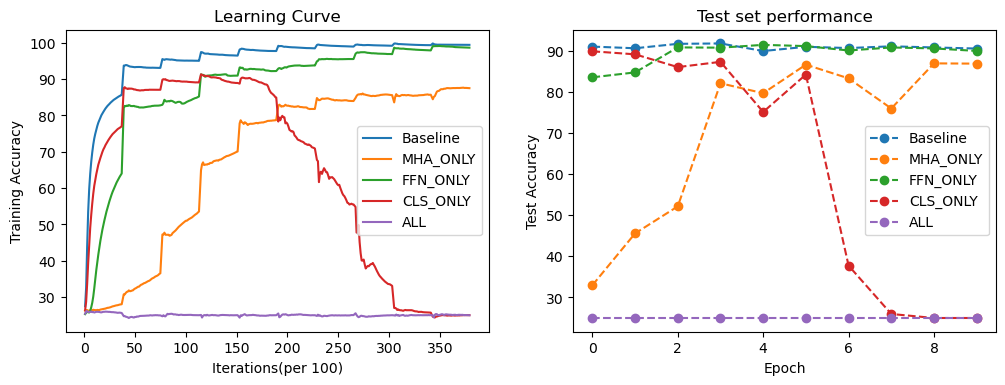

In [5]:
exps = ['BASELINE', 'MHA_ONLY', 'FFN_ONLY', 'CLS_ONLY', 'ALL']
legends = ['Baseline', 'MHA_ONLY', 'FFN_ONLY', 'CLS_ONLY', 'ALL']
fig_name = 'EXP2-1'
plot_all(exps, legends, fig_name)

## with & without final layer quantization

25.0
83.71052631578948


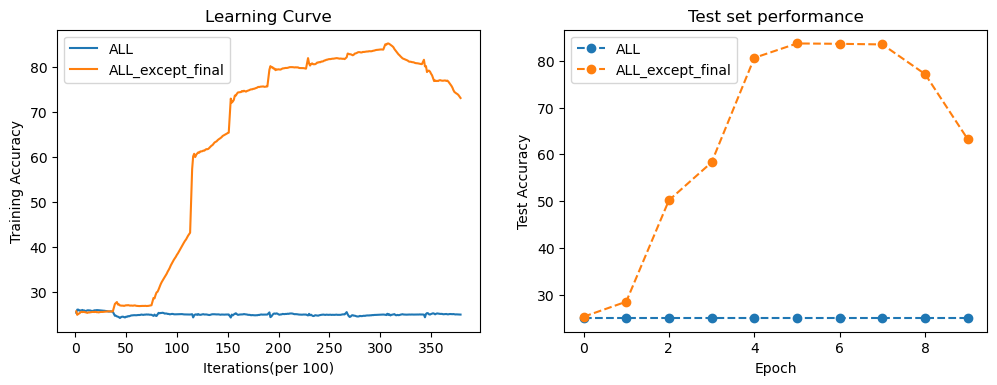

In [6]:
exps = ['ALL', 'ALL_wo_final']
legends = ['ALL', 'ALL_except_final']
fig_name = 'EXP2-2'
plot_all(exps, legends, fig_name)

## QK vs QKV

83.71052631578948
89.25
86.71052631578948
86.23684210526316


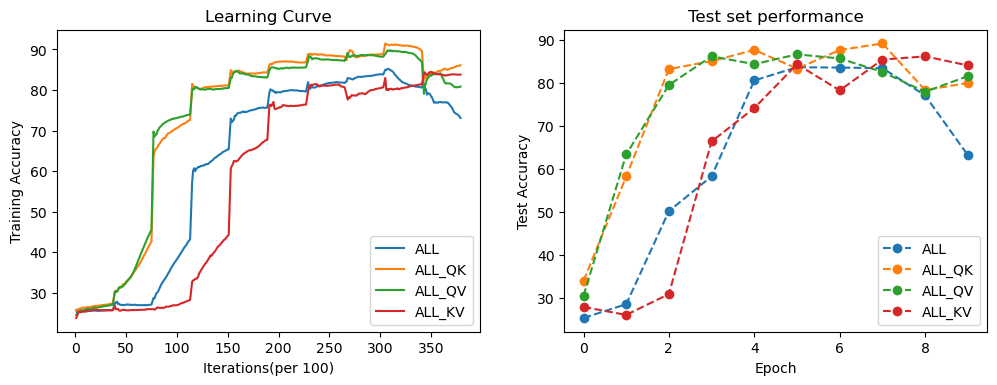

In [7]:
exps = ['ALL_wo_final',
        'ALL_QK',
        'ALL_QV',
        'ALL_KV']
legends = ['ALL', 'ALL_QK', 'ALL_QV','ALL_KV']
fig_name = 'EXP2-3'

plot_all(exps, legends, fig_name)

# EXP3

## Quantization

83.15789473684211
84.92105263157895
87.88157894736842


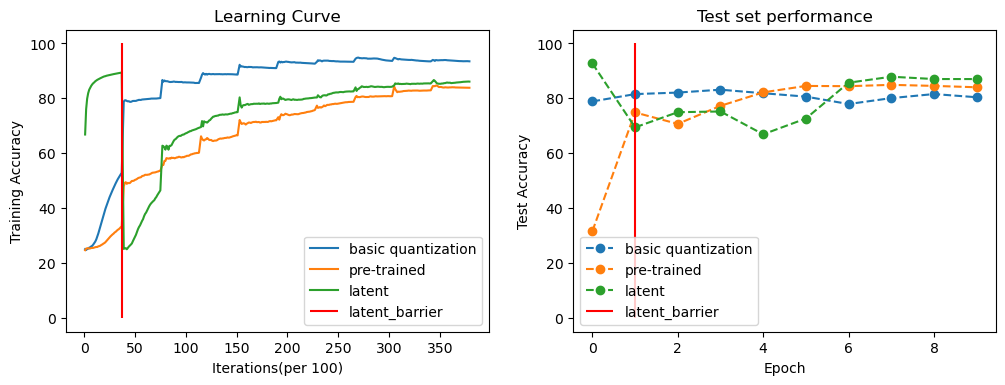

In [15]:
exps = ['quant_all_clip',
        'fully_quant_all_clip_pretrained',
        'fully_quant_all_clip_pretrained_1epoch_latent']
legends = ['basic quantization', 'pre-trained', 'latent']
fig_name = 'EXP3-1'
plot_all(exps, legends, fig_name, None, 1)

## Binarization

83.71052631578948
88.89473684210526
88.60526315789474


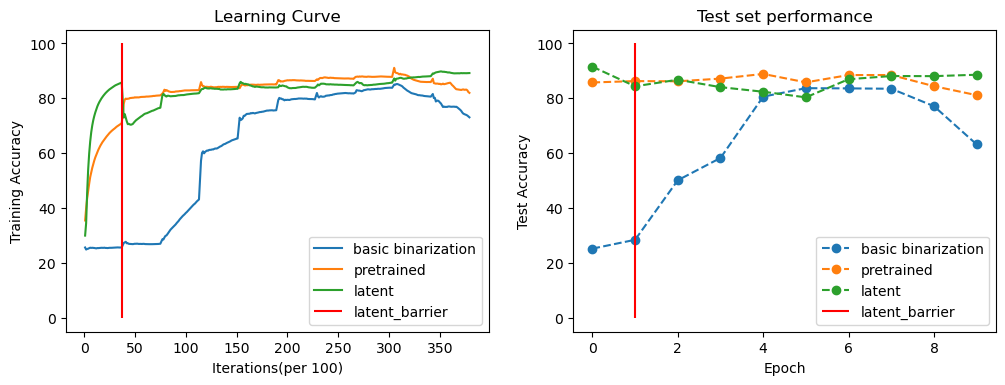

In [16]:
exps = ['ALL_wo_final',
        'ALL_pretrained',
        'basic_binarization_latent']
legends = ['basic binarization','pretrained', 'latent']
fig_name = 'EXP3-2'
plot_all(exps, legends, fig_name, None, 1)